In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()
# check that the condacolab installation went smoothly


✨🍰✨ Everything looks OK!


In [2]:
condacolab.check()

✨🍰✨ Everything looks OK!


# Mount Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [4]:
!pip install -U -q transformers[torch] evaluate accelerate
!pip install transformers datasets
from transformers import AutoTokenizer, AutoModelForMaskedLM, Trainer, TrainingArguments
from transformers import DataCollatorForLanguageModeling
from datasets import load_dataset, Dataset
import torch
import numpy as np
import math

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 kB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
!pip install git+https://github.com/huggingface/transformers
!pip install accelerate -U
!pip install datasets evaluate torch
!conda install -c conda-forge -c bioconda mmseqs2
!pip install scikit-learn
!pip install biopython
!pip install Bio

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-vmi4qmto
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-vmi4qmto
  Resolved https://github.com/huggingface/transformers to commit 863e2562d8d8a535caccb644b15efec663248daa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.40.0.dev0-py3-none-any.whl size=8807047 sha256=e079a895e8f7283a4b6d1934f68ba089ece2051a8b856fb0a3ea9f36a206a28e
  Stored in directory: /tmp/pip-ephem-wheel-cache-tk0paszg/wheels/c0/14/d6/6c9a5582d2ac191ec0a483be151a4495fe1eb2a6706ca49f1b
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.39.3
    Uninstalling transformers-4.39.3:
      Successfully uninstalled transformers-4.39.3
Channels:
 - conda-forge
 - bioconda
Pla

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 6.0 MB/s eta 0:00:00


In [6]:
!pip install fair-esm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.2 MB/s eta 0:00:00


In [7]:
import pandas as pd
from Bio import SeqIO
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import esm
import pickle
import json

#import esm

In [9]:
tokenizer = AutoTokenizer.from_pretrained("facebook/esm2_t33_650M_UR50D")
model = AutoModelForMaskedLM.from_pretrained("facebook/esm2_t33_650M_UR50D")

/usr/local/lib/python3.10/site-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/95.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/93.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/724 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.61G [00:00<?, ?B/s]

# Clustering/splitting traintest

In [10]:
#loading dataset

data = pd.read_csv(f'/content/drive/MyDrive/Pranay Vure/Individual Project 2/Part B/ANTICRISPR.csv')

# print dataset size
print('size of dataset: ', len(data))

# view the first 5 rows of the dataset
data.head()

size of dataset:  433


Sequence
0  MFNKAEIMKQAWNWFTDSNVWLSDIEWVSYTDKEKTFSVCLKAAWS...
1  MTLTRAQKKYAEAMHEFINMVDDFEESTPDFAKEVLHDSDYVVITK...
2  MDEIEDLSDLPMPRFIWGFAVIAGKGGEVMHDEFEYLTHTRSPRFT...
3  MIDFNSIDHAIALIQKDPEQANAIAGEYAYQMAREAYEIASESGFG...
4  MTTYYFSETSNINAYATAEALKAQTLADAKREASRRQCFQGTTLKI...

In [11]:
data

Sequence
0    MFNKAEIMKQAWNWFTDSNVWLSDIEWVSYTDKEKTFSVCLKAAWS...
1    MTLTRAQKKYAEAMHEFINMVDDFEESTPDFAKEVLHDSDYVVITK...
2    MDEIEDLSDLPMPRFIWGFAVIAGKGGEVMHDEFEYLTHTRSPRFT...
3    MIDFNSIDHAIALIQKDPEQANAIAGEYAYQMAREAYEIASESGFG...
4    MTTYYFSETSNINAYATAEALKAQTLADAKREASRRQCFQGTTLKI...
..                                                 ...
428  MSIKLLDEFLKKHNKTRYQLSKLTGISQNTLNDYNKKELNKYSVSF...
429  MTIKLLDEFLKKHDLTRYQLSKLTGISQNTLKDQNEKPLNKYTVSI...
430  MTLTRAQKKYAEAMHEFINMVDDFEESTPDFAKEVLHDSDYVVITK...
431  MDEIDELSDLPTPRFIWGFAIAVSPSGEVSHDEFEYLTHTRAPRFT...
432  MNINDLIREIKNKDYTVKLSGTDSNSITQLIIRVNNDGNEYVISES...

[433 rows x 1 columns]

In [12]:
newdata = data.copy()

In [13]:
newdata['id'] = [f'seq{i}' for i in range(len(data))]
newdata

Sequence      id
0    MFNKAEIMKQAWNWFTDSNVWLSDIEWVSYTDKEKTFSVCLKAAWS...    seq0
1    MTLTRAQKKYAEAMHEFINMVDDFEESTPDFAKEVLHDSDYVVITK...    seq1
2    MDEIEDLSDLPMPRFIWGFAVIAGKGGEVMHDEFEYLTHTRSPRFT...    seq2
3    MIDFNSIDHAIALIQKDPEQANAIAGEYAYQMAREAYEIASESGFG...    seq3
4    MTTYYFSETSNINAYATAEALKAQTLADAKREASRRQCFQGTTLKI...    seq4
..                                                 ...     ...
428  MSIKLLDEFLKKHNKTRYQLSKLTGISQNTLNDYNKKELNKYSVSF...  seq428
429  MTIKLLDEFLKKHDLTRYQLSKLTGISQNTLKDQNEKPLNKYTVSI...  seq429
430  MTLTRAQKKYAEAMHEFINMVDDFEESTPDFAKEVLHDSDYVVITK...  seq430
431  MDEIDELSDLPTPRFIWGFAIAVSPSGEVSHDEFEYLTHTRAPRFT...  seq431
432  MNINDLIREIKNKDYTVKLSGTDSNSITQLIIRVNNDGNEYVISES...  seq432

[433 rows x 2 columns]

In [14]:
# write the fasta

with open('one.fasta', 'w') as f:
  for i in range(len(newdata)):
    id = newdata.loc[i,'id']
    seq = newdata.loc[i,'Sequence']
    f.write(f'>{id}\n{seq}\n')

# check what you wrote - make sure it looks right
with open('one.fasta', 'r') as f:
  lines = f.readlines()
  print(''.join(lines[0:6]))

>seq0
MFNKAEIMKQAWNWFTDSNVWLSDIEWVSYTDKEKTFSVCLKAAWSKAKEEVKEVEKEIKHISKSEELKAWNWAERKLGLRFNISDDEKFTSVKDETKQHFGLSVWACAMKAVKLHNDLFPQTAA
>seq1
MTLTRAQKKYAEAMHEFINMVDDFEESTPDFAKEVLHDSDYVVITKNEKYAVALCSLSTDECEYDTNLYLDEKLVDYSTVDVNGVTYYINIVETKDIDDLEIATDEDEMKSDNQEIILKSELK
>seq2
MDEIEDLSDLPMPRFIWGFAVIAGKGGEVMHDEFEYLTHTRSPRFTCRVVELEDMPAESEEDAIDGRIVHDDDPSRMFYITDAGMALVNFQLFDKMPDKQKLKRICDEAIANWMLRREFLDEEEDD



In [15]:
!mmseqs easy-cluster one.fasta clusterRes_ones mmseqs_results --min-seq-id 0.3 -c 0.5 --cov-mode 0

Create directory mmseqs_results
easy-cluster one.fasta clusterRes_ones mmseqs_results --min-seq-id 0.3 -c 0.5 --cov-mode 0 

MMseqs Version:                     	15.6f452
Substitution matrix                 	aa:blosum62.out,nucl:nucleotide.out
Seed substitution matrix            	aa:VTML80.out,nucl:nucleotide.out
Sensitivity                         	4
k-mer length                        	0
Target search mode                  	0
k-score                             	seq:2147483647,prof:2147483647
Alphabet size                       	aa:21,nucl:5
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.5
Coverage mode                       	0
Compositional bias                  	1
Compositional bias                  	1
Diagonal scoring                    	true
Exact k-mer matching                	0
Mask residu

In [16]:
fasta_sequences = SeqIO.parse(open('clusterRes_ones_rep_seq.fasta'),'fasta')
id_list = []
seq_list = []

for fasta in fasta_sequences:
  id, sequence = fasta.id, str(fasta.seq)

  id_list.append(id)
  seq_list.append(sequence)

cluster_reps = pd.DataFrame(
    data = {
        'representative id': id_list,
        'sequence': seq_list
    }
)

print('Total clusters: {}'.format(len(cluster_reps)))
cluster_reps.head()

Total clusters: 40


representative id                                           sequence
0              seq0  MFNKAEIMKQAWNWFTDSNVWLSDIEWVSYTDKEKTFSVCLKAAWS...
1              seq3  MIDFNSIDHAIALIQKDPEQANAIAGEYAYQMAREAYEIASESGFG...
2              seq6  MTIKLLDEFLKKHDLTRYQLSKLTGISQNTLKDQNEKPLNKYTVSI...
3             seq11  MTITTAQKRYYDAMNEFEAITSKELEQTPEFSQDLLNDSDYLVITK...
4             seq18  MLYSEKVMDHFMHPRNVGEMENPSGVGEVGNAKCGDIMRMYLKIDE...

In [17]:
clusters = pd.read_csv(f'clusterRes_ones_cluster.tsv',sep='\t',header=None)
print('Total cluster members: {}'.format(len(clusters)))
print('All sequences were clustered: {}'.format(len(clusters)==len(data)))
clusters = clusters.rename(columns={
    0: 'representative id',
    1: 'member id'
})
clusters.head()

Total cluster members: 433
All sequences were clustered: True


representative id member id
0              seq0      seq0
1              seq0     seq12
2              seq0     seq14
3              seq0     seq20
4              seq0     seq21

In [18]:
clusters = pd.merge(clusters,
                    newdata.rename(columns={'id': 'member id',
                                            'Length':'length',
                                            'Sequence':'sequence'}),
                    on='member id',how='left')
clusters

cluster_sizes = clusters.groupby('representative id').size().reset_index(name='cluster_size')
clustersgb = cluster_sizes.sort_values(by='cluster_size', ascending=False).reset_index(drop=True)
print(clustersgb)


   representative id  cluster_size
0               seq6           112
1              seq11            85
2               seq0            53
3             seq402            44
4              seq52            23
5             seq330            13
6              seq87            13
7             seq227            12
8             seq356            11
9             seq281            10
10            seq228            10
11            seq134             8
12            seq319             4
13            seq136             3
14            seq395             2
15            seq199             2
16            seq298             2
17            seq222             2
18            seq236             2
19            seq323             2
20            seq193             1
21             seq18             1
22            seq152             1
23            seq255             1
24             seq32             1
25            seq321             1
26              seq3             1
27            seq307

In [19]:
clusters

representative id member id  \
0                seq0      seq0   
1                seq0     seq12   
2                seq0     seq14   
3                seq0     seq20   
4                seq0     seq21   
..                ...       ...   
428            seq281    seq226   
429            seq281    seq282   
430            seq281    seq427   
431            seq298    seq298   
432            seq298    seq254   

                                              sequence  
0    MFNKAEIMKQAWNWFTDSNVWLSDIEWVSYTDKEKTFSVCLKAAWS...  
1    MYNKAEIMKQAWNWFNDSNIWLSDIEWVSYTDKEKSFSVCLKAAWS...  
2    MYNKSEIMQQAWNWFRDSSVWLSDIEWVSYTDKEKTFSVCLKAAWS...  
3    MYNKAEIMKQAWNWFNNSNVWLSDIEWVSYTDKEKTFSVCLKAAWS...  
4    MYNKAEIMKQAWNWFNDSNIWLSDIEWVSYTDKEKSFSVCLKAAWS...  
..                                                 ...  
428  MTNVIYYFTETNNINAYTTAEALKAQTLADAKREASRRQCFQGTTL...  
429  MTTYYFTETNDRKAYRQAEALKAKTLADAKREATRRQVFYGTVLKI...  
430  MIYYIVRYNIDHVSKRDAAPSLQHYQPAAGDIKMTTTTYYFSESSS...  
431  MTTFRIENVRIETINDFDMVKFDLVTDLGRVELAEHVNYDSEGDFK...  
432  MTTFHIENARIETITDFDMVIFDLVTDLGRVDLAEHINYDRDGDFK...  

[433 rows x 3 columns]

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_indices = []
test_indices = []

#loop thru clusters
for x, group in clusters.groupby('representative id'):
    group_indices = group.index.tolist()

    if len(group_indices) > 1:
        #if splittable, split
        train_idx, test_idx = train_test_split(group_indices, test_size=0.2, random_state=42)
        train_indices.extend(train_idx)
        test_indices.extend(test_idx)
    else:
        #if only one protein just add to train
        train_indices.extend(group_indices)

class ClusteredProteinDataset(Dataset):
    def __init__(self, dataframe, indices, tokenizer, column='sequence'):
        self.dataframe = dataframe.iloc[indices].reset_index(drop=True)
        self.tokenizer = tokenizer
        self.column = column
        self.seqs = self.dataframe[self.column].tolist()

    def __len__(self):
        return len(self.seqs)

    def __getitem__(self, idx):
        sequence = self.seqs[idx]
        #dynamically process
        inputs = self.tokenizer(sequence, truncation=True, max_length=1024, padding="max_length")
        return inputs

train_dataset = ClusteredProteinDataset(clusters, train_indices, tokenizer)
test_dataset = ClusteredProteinDataset(clusters, test_indices, tokenizer)


# Function to dynamically mask tokens

In [21]:
def collate_fn(tokenizer, maskprob):
  collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, maskprob = maskprob)
  return collator

In [22]:
collator = collate_fn(tokenizer, 0.15)

# Defining training funcs

In [23]:
import pandas as pd
from transformers import TrainingArguments, TrainerCallback


In [49]:
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/Pranay Vure/Individual Project 2/Part B/output',
    overwrite_output_dir=True,
    logging_dir='/content/drive/MyDrive/Pranay Vure/Individual Project 2/Part B/logs',
    logging_strategy="epoch",
    evaluation_strategy="epoch",
    num_train_epochs=20,
    weight_decay=0.01,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    learning_rate=1e-3, #made this pretty high because my losses weren't converging :(
    push_to_hub=False
)

In [30]:
from torch.optim import AdamW

trainer

In [31]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=collator,
    optimizers = (AdamW(model.parameters()), None)
)

# Training model

In [32]:
trainer.train()

TrainOutput(global_step=3420, training_loss=2.7856802332470987, metrics={'train_runtime': 3077.6571, 'train_samples_per_second': 2.222, 'train_steps_per_second': 1.111, 'total_flos': 2.735829157330944e+16, 'train_loss': 2.7856802332470987, 'epoch': 20.0})

In [69]:
df = pd.DataFrame(trainer.state.log_history)
train_loss = df['loss'].dropna().tolist()
eval_loss = df['eval_loss'].dropna().tolist()

In [70]:
df

loss  grad_norm  learning_rate  epoch  step  eval_loss  eval_runtime  \
0   2.9100   2.216928        0.00095    1.0   171        NaN           NaN   
1      NaN        NaN            NaN    1.0   171   2.849262       10.9546   
2   2.8842   2.225282        0.00090    2.0   342        NaN           NaN   
3      NaN        NaN            NaN    2.0   342   2.862265       10.9489   
4   2.8768   2.042884        0.00085    3.0   513        NaN           NaN   
5      NaN        NaN            NaN    3.0   513   2.874092       10.9884   
6   2.8486   2.025653        0.00080    4.0   684        NaN           NaN   
7      NaN        NaN            NaN    4.0   684   2.857047       10.9607   
8   2.8619   1.450574        0.00075    5.0   855        NaN           NaN   
9      NaN        NaN            NaN    5.0   855   2.844653       10.9290   
10  2.8538   1.647722        0.00070    6.0  1026        NaN           NaN   
11     NaN        NaN            NaN    6.0  1026   2.857037       10.9694   
12  2.8739   1.382280        0.00065    7.0  1197        NaN           NaN   
13     NaN        NaN            NaN    7.0  1197   2.871894       10.9413   
14  2.8391   0.884002        0.00060    8.0  1368        NaN           NaN   
15     NaN        NaN            NaN    8.0  1368   2.859033       10.9356   
16  2.8324   1.962132        0.00055    9.0  1539        NaN           NaN   
17     NaN        NaN            NaN    9.0  1539   2.805924       10.9385   
18  2.8124   1.400412        0.00050   10.0  1710        NaN           NaN   
19     NaN        NaN            NaN   10.0  1710   2.840910       10.9246   
20  2.8194   1.113912        0.00045   11.0  1881        NaN           NaN   
21     NaN        NaN            NaN   11.0  1881   2.816893       10.9316   
22  2.8102   1.996039        0.00040   12.0  2052        NaN           NaN   
23     NaN        NaN            NaN   12.0  2052   2.813597       10.9472   
24  2.7914   2.037825        0.00035   13.0  2223        NaN           NaN   
25     NaN        NaN            NaN   13.0  2223   2.798455       10.9287   
26  2.7732   0.984934        0.00030   14.0  2394        NaN           NaN   
27     NaN        NaN            NaN   14.0  2394   2.783611       10.9214   
28  2.7615   1.452306        0.00025   15.0  2565        NaN           NaN   
29     NaN        NaN            NaN   15.0  2565   2.752174       11.0188   
30  2.7116   1.645415        0.00020   16.0  2736        NaN           NaN   
31     NaN        NaN            NaN   16.0  2736   2.694101       10.9177   
32  2.6754   1.730511        0.00015   17.0  2907        NaN           NaN   
33     NaN        NaN            NaN   17.0  2907   2.676960       10.9324   
34  2.6363   1.045933        0.00010   18.0  3078        NaN           NaN   
35     NaN        NaN            NaN   18.0  3078   2.615652       10.9568   
36  2.5924   1.200501        0.00005   19.0  3249        NaN           NaN   
37     NaN        NaN            NaN   19.0  3249   2.626849       10.9202   
38  2.5489   1.913724        0.00000   20.0  3420        NaN           NaN   
39     NaN        NaN            NaN   20.0  3420   2.544728       10.9280   
40     NaN        NaN            NaN   20.0  3420        NaN           NaN   
41     NaN        NaN            NaN   20.0  3420   2.562659       10.9949   

    eval_samples_per_second  eval_steps_per_second  train_runtime  \
0                       NaN                    NaN            NaN   
1                     8.307                  4.199            NaN   
2                       NaN                    NaN            NaN   
3                     8.311                  4.201            NaN   
4                       NaN                    NaN            NaN   
5                     8.281                  4.186            NaN   
6                       NaN                    NaN            NaN   
7                     8.302                  4.197            NaN   
8                       NaN   

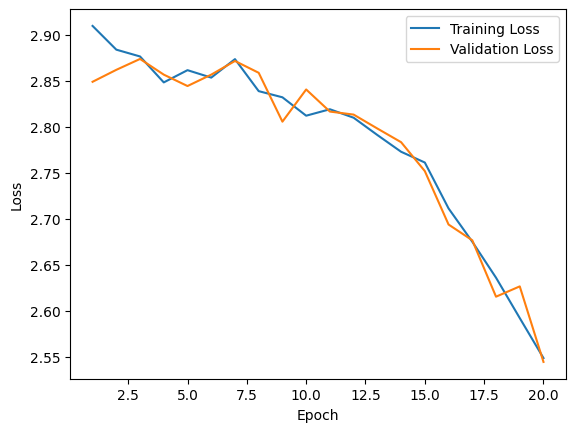

In [71]:
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, eval_loss[:len(train_loss)], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


#Perplexity calc

In [74]:
eval_results = trainer.evaluate()
print(f"Perplexity: {math.exp(eval_results['eval_loss']):.2f}")

Perplexity: 12.97


# Inference

In [63]:
model = AutoModelForMaskedLM.from_pretrained('/content/drive/MyDrive/Pranay Vure/Individual Project 2/Part B/output/checkpoint-1000')
tokenizer = AutoTokenizer.from_pretrained("facebook/esm2_t33_650M_UR50D")
proteins = pd.read_csv('/content/drive/MyDrive/Pranay Vure/Individual Project 2/Part B/top10_plddts.csv')
proteins.head()

Sequence  AlphaFold2 PLDDT  \
0  MTEIDNTEIDNTEIDNTEIDNTEIDNTEIDNTEIDNTEIDNTEIDN...              91.1   
1  MKEKFSLYDFLAIILPGIAFIVVFRIIFSSLHLSLPVDIPLGLEST...              86.2   
2  MLHPCVCLDACACVRACVRACVRACVRACVRACVRACVRACVRACV...              76.0   
3  MTLPMPRFIWGFAIFTPKGGEVMHDEFEYLTHTRSPRFTCRVVELE...              88.4   
4  MSLSEKIITTAQKRYYDAMNEFEAIISKELEQTPAFSQDLLNDSDY...              89.6   

   ESMFold PLDDT  
0         91.625  
1         82.286  
2         41.565  
3         53.980  
4         53.279

In [68]:
from random import sample as random_sample

def maskseqs(list_of_sequences, prob=0.15):
    masked_seq_list = []
    mask_char = '<mask>'

    for seq in list_of_sequences:
        mask_count = int(len(seq) * prob)
        mask_positions = random_sample(range(len(seq)), mask_count)
        seq_chars = list(seq)
        for pos in mask_positions:
            seq_chars[pos] = mask_char
        masked_seq_list.append(''.join(seq_chars))
    return masked_seq_list

protein_sequences = proteins['Sequence'].tolist()
sequences_with_masks = maskseqs(protein_sequences)
print(sequences_with_masks)
print(f"Number of sequences processed: {len(sequences_with_masks)}")


['MTEIDNT<mask>IDNTEI<mask>N<mask>EIDNT<mask>IDNTEIDNTEI<mask>NTEID<mask>TEI<mask>NTE<mask><mask>N<mask>EI<mask>NTEIDNTEIDNTE<mask>DNTEIDNTEI<mask>NTEIDNTEIDNTEID<mask>TEIDNTE<mask><mask>N<mask>EIDNTE<mask>DNTEIDNTEI<mask>NTEI<mask>N<mask><mask>I<mask>NTEIDNTEID<mask>TEIDNTEI<mask>NTEIDNTEID<mask>TEIDNTEIDNTEIDN<mask>EIDN<mask>EI<mask>NTEI<mask>NTEI<mask>NT<mask>IDNTEID<mask>TEIDNTEIDNT<mask>IDNTEIDNTE<mask><mask>NTEIDNTEID', 'MKEK<mask>SLYDF<mask>AII<mask><mask><mask>IAFIVVFR<mask>IFS<mask>LHLSLPVDIPLGLEST<mask>VYALICGAVLYVLSFS<mask>VKL<mask>PRLFGLYRHVADLYQ<mask>MKAL<mask>P<mask>MNDTLNRQAE<mask>WGL<mask>KIY<mask>SEE<mask><mask><mask>QSEEKEK<mask>RML<mask>S<mask>FY<mask>RMWY<mask>LD<mask>RGKL<mask>NAKSFQCYYFFFRHSFWGLVLISLILLSYK<mask>LA<mask>IPAC<mask>MED<mask>G<mask>REYSDI<mask>VPIMI<mask>SALFV<mask>LAQWFRIKMVEKMYWTFY<mask>SLIE<mask>ENS<mask>LMTI<mask>LLDEFLK<mask>HDLTRYQ<mask>SKL<mask>GISQNTLKDQNEKPLNKYT<mask>SIL', 'MLH<mask>CVCLDACAC<mask>RACVRACVRACVRAC<mask>RA<mask>VRACVRACVRACVRAC

making a function to print the top 3 mutations for each sequence

In [83]:
mutated = []

In [85]:
import torch

seqs = proteins['Sequence'].tolist()
maskedsequences = maskseqs(seqs)
print(maskedsequences)

for i, text in enumerate(maskedsequences):
    print(f"Processing sequence {i+1}/{len(maskedsequences)}:")

    #tokenize seq
    inputs = tokenizer(text, return_tensors="pt")

    #logits (probabilities)
    with torch.no_grad():
        logits = model(**inputs).logits

    #index of masked token
    mask_token_index = torch.where(inputs["input_ids"] == tokenizer.mask_token_id)[1]

    #logits for masked token, top 3 token predictions
    mask_token_logits = logits[0, mask_token_index, :]
    top_3_tokens = torch.topk(mask_token_logits, 3, dim=1).indices[0].tolist()

    #decode and print top 3 for each mask
    for token in top_3_tokens:
        decoded_token = tokenizer.decode([token])
        print(text.replace(tokenizer.mask_token, decoded_token))
        mutated.append(text.replace(tokenizer.mask_token, decoded_token))

    print()


['MTEID<mask>TEI<mask>NTEIDN<mask>EIDN<mask>EIDNTEI<mask>NTEIDNTEIDNTE<mask>DNTEIDNTEIDNTEID<mask>TE<mask>DNTE<mask>DNTEIDNTE<mask><mask>N<mask><mask><mask>DN<mask>EIDNTEIDN<mask>EI<mask>NTEIDNT<mask><mask>DNTEIDNT<mask>ID<mask>TEIDNTEIDN<mask>EIDNT<mask>IDNTEID<mask><mask>EID<mask><mask>EIDNTEIDNTEID<mask>TE<mask>DNTEIDN<mask>E<mask>DNTEIDNTEIDNTEIDNTEIDNTEIDNTEIDNTEIDNTE<mask>DN<mask><mask>IDNTEID<mask>TE<mask>DNTEIDNTEID', 'MKEKFSLYDFLAIILPGIAFIVVF<mask>IIFSSLHLS<mask>PVD<mask><mask>LGLESTI<mask><mask>A<mask><mask>CGAVLYVLSFSLVKLFPRLFGLYRHVADLYQKM<mask>ALHPIMNDTLNRQAEQ<mask><mask>L<mask>K<mask>Y<mask>SEEEF<mask>QSEEKEKIRMLQ<mask>DFYDRM<mask>YRL<mask>FRGKLGN<mask>KSFQ<mask><mask><mask>FFFRH<mask>FWGLVLISLIL<mask><mask>YKL<mask>AYIPACDM<mask>DIGWREYSDIAVPIMILS<mask>LFVFLA<mask>WFRIK<mask>VE<mask>M<mask>WTFYISLI<mask>QENSNLMTIK<mask>LDEFLK<mask>HDL<mask>RY<mask><mask>SKLT<mask>ISQNTLK<mask>QN<mask>K<mask>LNKYTVSIL', 'MLHPCVCLD<mask>CACV<mask>ACVRACVRACVRACV<mask>A<mask>VRACVRACVRACVRAC

In [91]:
chunks = [mutated[i:i + 3] for i in range(0, len(mutated), 3)]
mutated_sequences = pd.DataFrame(chunks).transpose()
mutated_sequences.columns = [f'Protein {i+1}' + " Mutations" for i in range(len(mutated_sequences.columns))]

In [92]:
mutated_sequences.head()

Protein 1 Mutations  \
0  MTEIDETEIENTEIDNEEIDNEEIDNTEIENTEIDNTEIDNTEEDN...   
1  MTEIDLTEILNTEIDNLEIDNLEIDNTEILNTEIDNTEIDNTELDN...   
2  MTEIDDTEIDNTEIDNDEIDNDEIDNTEIDNTEIDNTEIDNTEDDN...   

                                 Protein 2 Mutations  \
0  MKEKFSLYDFLAIILPGIAFIVVFEIIFSSLHLSEPVDEELGLEST...   
1  MKEKFSLYDFLAIILPGIAFIVVFLIIFSSLHLSLPVDLLLGLEST...   
2  MKEKFSLYDFLAIILPGIAFIVVFDIIFSSLHLSDPVDDDLGLEST...   

                                 Protein 3 Mutations  \
0  MLHPCVCLDECACVEACVRACVRACVRACVEAEVRACVRACVRACV...   
1  MLHPCVCLDLCACVLACVRACVRACVRACVLALVRACVRACVRACV...   
2  MLHPCVCLDDCACVDACVRACVRACVRACVDADVRACVRACVRACV...   

                                 Protein 4 Mutations  \
0  MTLPMPRFIWEFAIETPKEGEEMHDEFEELTHERSPRFTCRVEELE...   
1  MTLPMPRFIWLFAILTPKLGELMHDEFELLTHLRSPRFTCRVLELE...   
2  MTLPMPRFIWDFAIDTPKDGEDMHDEFEDLTHDRSPRFTCRVDELE...   

                                 Protein 5 Mutations  \
0  MSLSEKIITTEQKRYYDEMNEFEAIISEELEQTPAFSQDLLEDSDY...   
1  MSLSLKIITTLQKRYYDLMNEFEAIISLLLEQTPAFSQDLLLDSDY...   
2  MSLSDKIITTDQKRYYDDMNEFEAIISDDLEQTPAFSQDLLDDSDY...   

                                 Protein 6 Mutations  \
0  MEDPIADMLTRVRAEEQTPEFSQDLLEDSDYLVETKNEAYAVEECM...   
1  MLDPIADMLTRVRALEQTPEFSQDLLLDSDYLVLTKNEAYAVLLCM...   
2  MDDPIADMLTRVRADEQTPEFSQDLLDDSDYLVDTKNEAYAVDDCM...   

                                 Protein 7 Mutations  \
0  MRDKFSLEDFEEIIEPGIAFIVVFREIFSSLHLSLPVDIPLGLESE...   
1  MRDKFSLLDFLLIILPGIAFIVVFRLIFSSLHLSLPVDIPLGLESL...   
2  MRDKFSLDDFDDIIDPGIAFIVVFRDIFSSLHLSLPVDIPLGLESD...   

                                 Protein 8 Mutations  \
0  MSELIENGQIIAKTSATLASGESEAFEAVSETHLRIEEKPIDGELE...   
1  MSLLILNGQIIAKTSATLASGLSLAFLAVSLTHLRIELKPIDGLLL...   
2  MSDLIDNGQIIAKTSATLASGDSDAFDAVSDTHLRIEDKPIDGDLD...   

                                 Protein 9 Mutations  \
0  MTLSEKIITTAQKRYYDAENEFEAIISEELEQTPAFSQDLLNDSDY...   
1  MTLSEKIITTAQKRYYDALNLFLAIISLELEQTPAFSQDLLNDSDY...   
2  MTLSEKIITTAQKRYYDADNDFDAIISDELEQTPAFSQDLLNDSDY...   

                                Protein 10 Mutations  
0  MSEFTCRVVELEDEEAEPEEDGEIEGRIEHFDNPKREFYETELGLA...  
1  MSLFTCRVVELEDLLAEPEEDGLILGRILHFDNPKRLFYLTLLGLA...  
2  MSDFTCRVVELEDDDAEPEEDGDIDGRIDHFDNPKRDFYDTDLGLA...

i want to save time so what i'll do is feed these through esmfold which is faster than alphafold. if the sequence has a higher esmfold plddt then i'll feed through alfafold. for now i'll put these sequences in a list so i can work with them.

In [125]:
mutated_sequences["Protein 10 Mutations"][2]

'MSDFTCRVVELEDDDAEPEEDGDIDGRIDHFDNPKRDFYDTDLGLALDDFTLFDDVDSKAKLDKACDDAIADWLTRRDDLDSEPEDDEEMSDDLLDEFLKKHSKTRYQDSKLTGISQNTLNDDNKKDLNKDSVSFLRDLDMCAGDDTFDVFIELAELEKSYDDLADDKDLLDKYKLSFPAQEFELYCLIKEDECADIEVLPDTFDRFENETHVDIEKDVRKALENAITVLKDDKNDLIMTITTAQDRYYDAMNEFDAIISDELEQTPAFDQDLLNDSDYLDIT'

[i'm using esmfold at this link](hhttps://colab.research.google.com/github/sokrypton/ColabFold/blob/main/ESMFold.ipynb)
